# Minatar CDT Test Results

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def smooth(y, radius=200, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]
    
def plot_learning_curve(file_name):
    r = np.load(file_name+'.npy')
    x=np.arange(r.shape[0])

    plt.plot(x,smooth(r))
    plt.plot(x,r, alpha=0.7)
    plt.savefig(file_name+'.png')
    plt.show()


## One pixel per car
**CDT** uses _get_low_dimension_state()_ image processor.

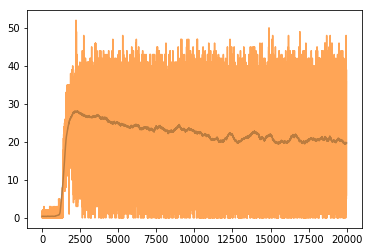

In [2]:
file_name='./log/no_plus/cdt_ppo_discrete_freewaydepth_33_id0'

plot_learning_curve(file_name)

## Two pixels per car
1. **CDT** uses _get_low_dimension_state_plus()_ image processor.

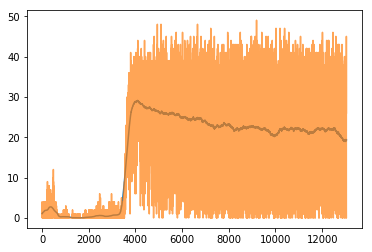

In [3]:
file_name='./log/plus/cdt_ppo_discrete_freewaydepth_33_id0'

plot_learning_curve(file_name)

2. **Neural network** uses _get_low_dimension_state_plus()_ image processor.

    Network structure: 1 shared layer, 1 layer for policy and 1 layer for value function, 128 hidden units.

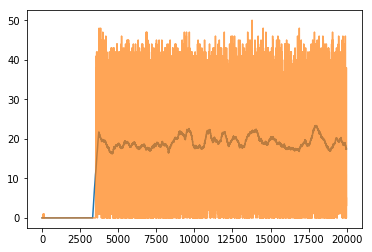

In [7]:
file_name='./log/ppo_discrete_freeway_id0_small'

plot_learning_curve(file_name)

3. **Neural network** uses _get_low_dimension_state_plus()_ image processor.

    Network structure: 2 shared layer, 1 layer for policy and 1 layer for value function, 128 hidden units.

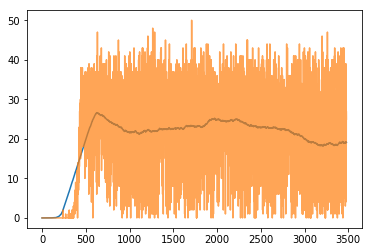

In [8]:
file_name='./log/ppo_discrete_freeway_id0_large'

plot_learning_curve(file_name)

Change hyperparameters and network architecture.

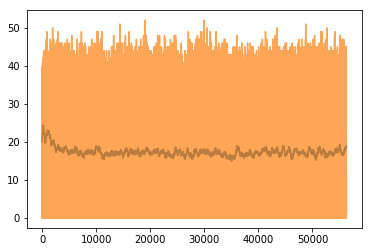

In [5]:
file_name='./log/ppo_discrete_freeway_id0_new'

plot_learning_curve(file_name)

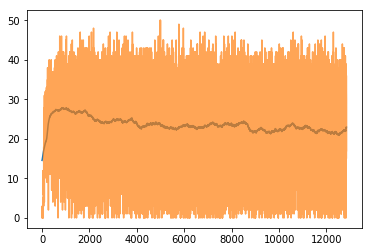

In [6]:
file_name='./log/cdt_ppo_discrete_freewaydepth_33_id0_new'

plot_learning_curve(file_name)

Multiprocess for training a long enough period

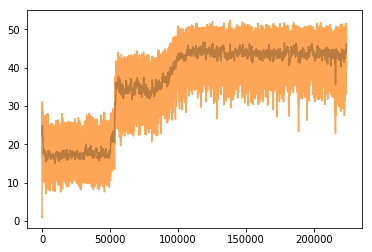

In [14]:
file_name='./log/ppo_discrete_freeway_id0'

plot_learning_curve(file_name)

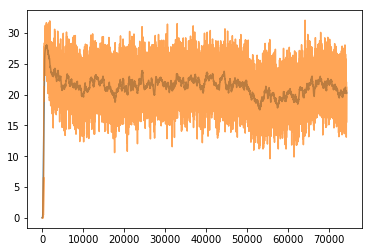

In [15]:
file_name='./log/cdt_ppo_discrete_freewaydepth_33_id0'

plot_learning_curve(file_name)

__Conclusions__: 

Both _get_low_dimension_state()_ and _get_low_dimension_state_plus()_ do not seem to work, actions taken by the policy are mostly just going forward, without capturing information from observations.